In [1]:
import numpy as np
from PIL import Image

**Load the image**

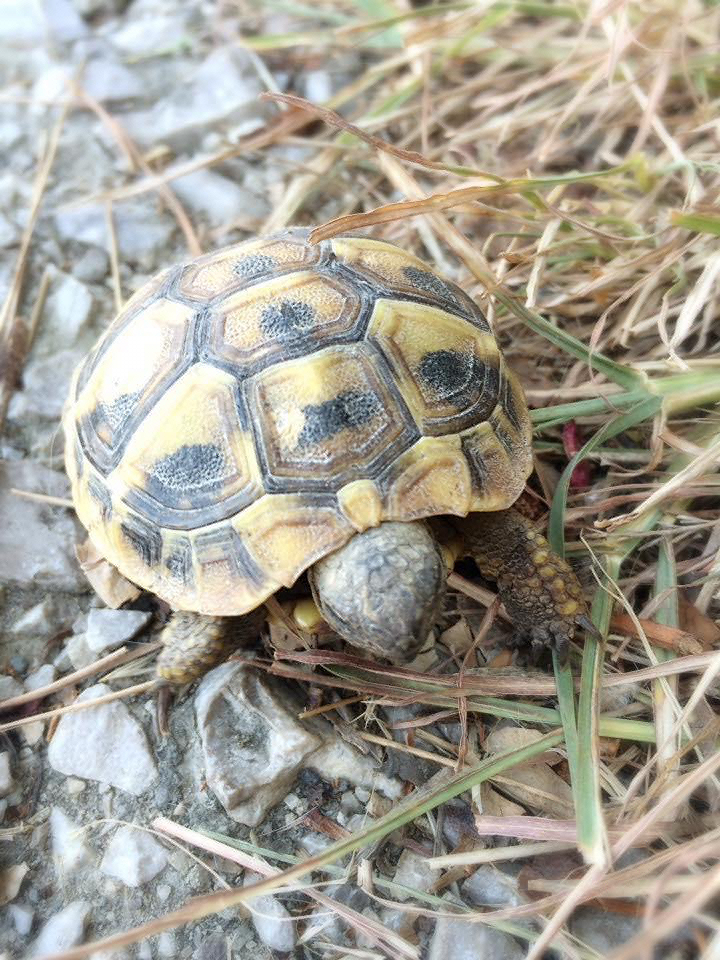

In [2]:
hm_img = Image.open('hidden_message.png')
hm_img

In [3]:
hm_img_mat = np.array(list(hm_img.getdata()), float)
hm_img_mat.shape

(691200, 3)

**Extract each of the RGB channels**

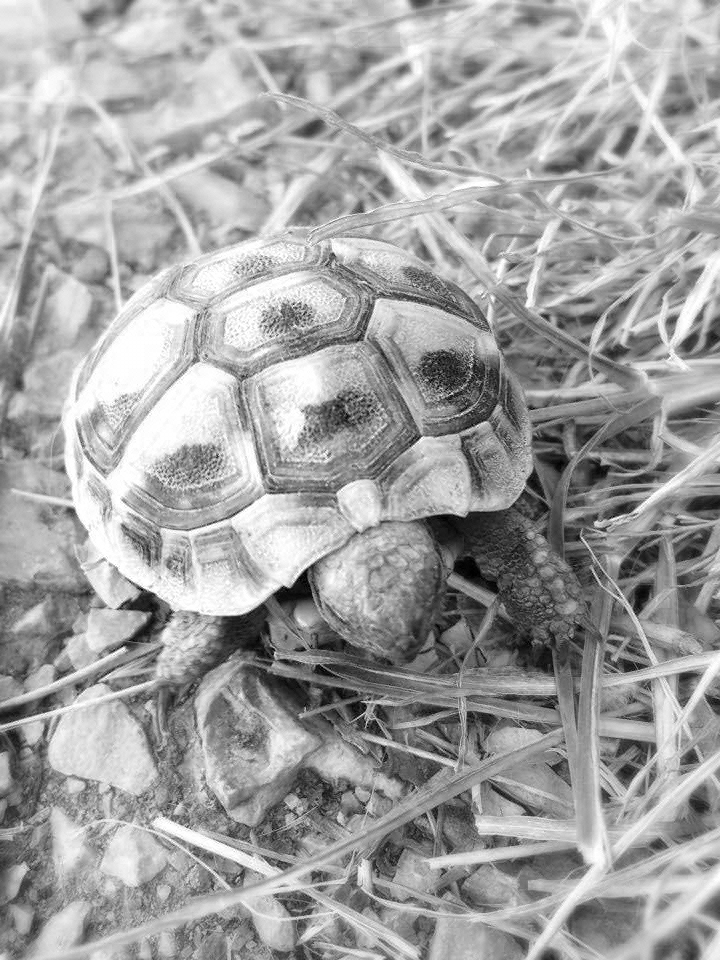

In [4]:
hm_imgR = hm_img.getchannel(0)    # Red channel in L-mode (Luminance)
hm_imgR

In [5]:
hm_imgG = hm_img.getchannel(1)    # Green channel in L-mode (Luminance)
hm_imgB = hm_img.getchannel(2)    # Blue channel in L-mode (Luminance)

**Convert the channels into numpy array to make it easy to manipulate**

In [6]:
hm_imgR_mat = np.array(hm_imgR)
print(hm_imgR_mat.shape)
print('\n', hm_imgR_mat)

(960, 720)

 [[248 248 246 ... 159 160 164]
 [246 246 249 ... 166 167 162]
 [244 244 247 ... 166 170 170]
 ...
 [215 217 208 ... 236 235 236]
 [217 214 214 ... 234 233 234]
 [225 218 213 ... 235 233 231]]


In [7]:
hm_imgG_mat = np.array(hm_imgG)
hm_imgG_mat.shape

(960, 720)

In [8]:
hm_imgB_mat = np.array(hm_imgB)
hm_imgB_mat.shape

(960, 720)

**Create numpy arrays to store pixel values of message image**

In [9]:
dimension_R1, dimension_R2 = hm_imgR_mat.shape
msg_R = np.empty(shape = (dimension_R1//4, dimension_R2//4))
msg_R.shape

(240, 180)

In [10]:
dimension_G1, dimension_G2 = hm_imgG_mat.shape
msg_G = np.empty(shape = (dimension_R1//4, dimension_R2//4))
msg_G.shape

(240, 180)

In [11]:
dimension_B1, dimension_B2 = hm_imgB_mat.shape
msg_B = np.empty(shape = (dimension_R1//4, dimension_R2//4))
msg_B.shape

(240, 180)

**Normalize image channel arrays**

In [12]:
def normalize_imgmat(imgmat):
    '''
      Min-Max scaling
      Values between [0-1]
    '''

    min_value = imgmat.min()
    max_value = imgmat.max()
    normalized_imgmat = (imgmat - min_value) / (max_value - min_value)
    return normalized_imgmat

In [13]:
hm_imgR_norm = normalize_imgmat(hm_imgR_mat)
hm_imgR_norm

array([[0.97254902, 0.97254902, 0.96470588, ..., 0.62352941, 0.62745098,
        0.64313725],
       [0.96470588, 0.96470588, 0.97647059, ..., 0.65098039, 0.65490196,
        0.63529412],
       [0.95686275, 0.95686275, 0.96862745, ..., 0.65098039, 0.66666667,
        0.66666667],
       ...,
       [0.84313725, 0.85098039, 0.81568627, ..., 0.9254902 , 0.92156863,
        0.9254902 ],
       [0.85098039, 0.83921569, 0.83921569, ..., 0.91764706, 0.91372549,
        0.91764706],
       [0.88235294, 0.85490196, 0.83529412, ..., 0.92156863, 0.91372549,
        0.90588235]])

In [14]:
hm_imgG_norm = normalize_imgmat(hm_imgG_mat)
hm_imgB_norm = normalize_imgmat(hm_imgB_mat)

**Compute singular values for each non-overlapping 4 * 4 block in the image**

In [15]:
def find_block_sv(arr_ch, msg_ch, T):
    '''
      Find the singular values of each block as 𝜎1, 𝜎2, 𝜎3, 𝜎4, sorted in descending order
      Encode 1 "bit" of information as the difference between 𝜎2 and 𝜎3 wrt a threshold T
      Map the resulting bit value to the corresponding message pixel
    '''
    n_rows, n_cols = msg_ch.shape
    for i in range(n_rows):
        for j in range(n_cols):
            block = arr_ch[4 * i: 4 * (i + 1), 4 * j: 4 * (j + 1)]
            U, sigma, V = np.linalg.svd(block)
            sig_1, sig_2, sig_3, sig_4 = sigma
            msg_pix_val = 0
            if sig_2 - sig_3 > T:
                msg_pix_val = 1
            msg_ch[i][j] = msg_pix_val
    return msg_ch

In [16]:
T = 0.004     # Constant

In [17]:
msg_R = find_block_sv(hm_imgR_norm, msg_R, T)
msg_R

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [18]:
msg_G = find_block_sv(hm_imgG_norm, msg_G, T)
msg_B = find_block_sv(hm_imgB_norm, msg_B, T)

**Superimpose the three message channels**

In [19]:
# To create an RGB image from the three message channels

msg_uint8 = (np.dstack((msg_R, msg_G, msg_B)) * 255.999) .astype(np.uint8)
    # The reason for using 255.999 instead of 255 is to ensure that rounding errors are properly handled.
    # Multiplying by 255 would round down values less than 1 to 0, which might result in loss of information.
msg_uint8.shape

(240, 180, 3)

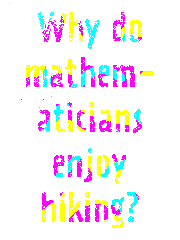

In [20]:
msg_img = Image.fromarray(msg_uint8)
msg_img

**Bonus - A play-on-words response**

`Mathematicians enjoy hiking because they are "add-venturous" "math-letes" who embark on a "pi-cnic" to find the "X" that marks the "vertex" with the most "sin-fully" beautiful "derivative" of the scenery and "acute" "tan-gential" insights "calculated" on the minimum "cos-t" "path", all while avoiding "complex" wildlife, "irrational" obstacles and "undefined" trails!`